In [1]:
#
import xarray as xr
import zipfile

import sys

sys.path.append("../")

from src.processing import windsat_datacube

zip_file_path = r"..\data\raw\ERA5_land\2017_01_01.zip"
netcdf_name = "data.nc"

In [2]:
with zipfile.ZipFile(zip_file_path, "r") as zip_file:
    with zip_file.open(netcdf_name) as nc_file:
        era_ds = xr.open_dataset(nc_file)

# Grid is 0.1º
era_ds = era_ds.roll({"longitude": 180 * 10})

In [3]:
era_ds

<xarray.Dataset> Size: 2GB
Dimensions:    (longitude: 3600, latitude: 1801, time: 24)
Coordinates:
  * longitude  (longitude) float32 14kB 0.0 0.1 0.2 0.3 ... 359.7 359.8 359.9
  * latitude   (latitude) float32 7kB 90.0 89.9 89.8 89.7 ... -89.8 -89.9 -90.0
  * time       (time) datetime64[ns] 192B 2017-01-01 ... 2017-01-01T23:00:00
Data variables:
    skt        (time, latitude, longitude) float32 622MB nan nan ... 244.9 244.9
    stl1       (time, latitude, longitude) float32 622MB nan nan ... 231.3 231.3
    tsn        (time, latitude, longitude) float32 622MB nan nan ... 244.8 244.8
Attributes:
    Conventions:  CF-1.6
    history:      2024-05-02 07:05:02 GMT by grib_to_netcdf-2.24.0: /opt/ecmw...

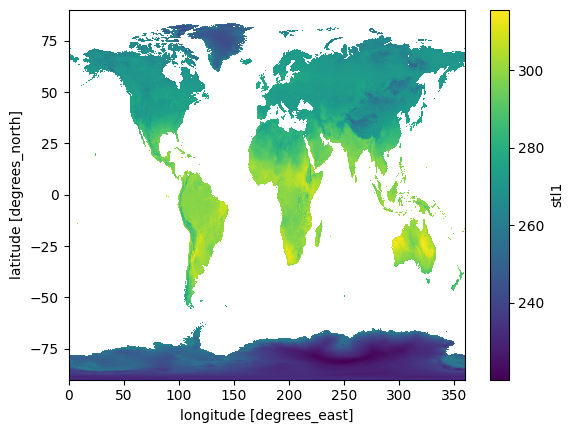

In [4]:
era_ds.stl1.mean(dim="time").plot()

In [5]:
# Load windsat data and ERA5 for a single point (station) and see the correlation

windsat_ds = windsat_datacube("../data/raw/daily_Windsat/")

In [6]:
timeseries = windsat_ds.tbtoa.sel(latitude_grid=(0 + 90) * 4, longitude_grid=(200) * 4)

In [7]:
timeseries = timeseries.sel(polarization=1, frequency_band=1, swath_sector=0)

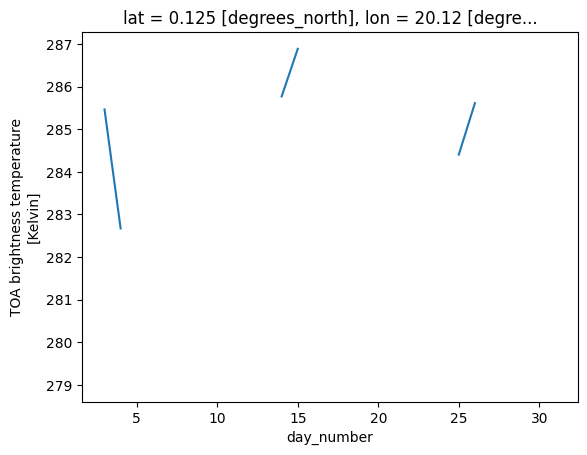

In [8]:
timeseries.plot()

Windsat data is very poor in the winter and near the equator.

The full year should have a more interesting plot...

In [15]:
era_timeseries = era_ds.stl1.sel(latitude=0, longitude=200, method="nearest")

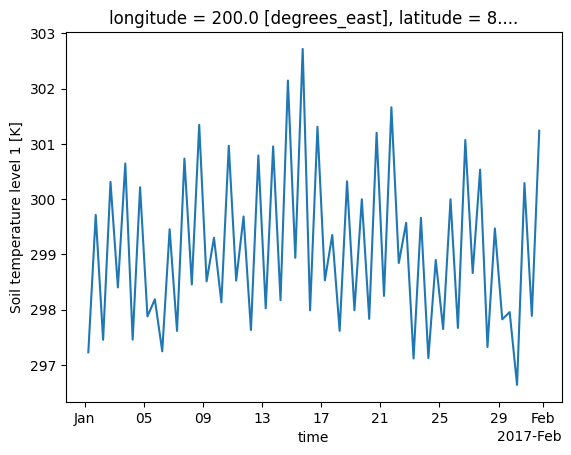

In [16]:
era_timeseries.plot()